<a href="https://colab.research.google.com/github/Akash-Git20/bitcoin_price_prediction/blob/main/Import_dataset_and_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import os
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from sklearn.ensemble import RandomForestClassifier

In [3]:
tz = pytz.timezone("America/New_York")
start = tz.localize(dt(2014,1,1))
end = tz.localize(dt.today())
tickers = "BTC-USD"
df = yf.download(tickers,start, end, auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2023-11-07  35047.792969  35892.417969  34545.816406  35443.562500   
2023-11-08  35419.476562  35994.417969  35147.800781  35655.277344   
2023-11-09  35633.632812  37926.257812  35592.101562  36693.125000   
2023-11-10  36702.250000  37493.800781  36362.753906  37313.968750   
2023-11-11  37310.070312  37407.093750  36947.570312  37117.570312   

                 Volume      Tomorrow  Target  
Date                                           
2014-09-17     21056800    424.440002       0  
2014-09-18     34483200    394.795990       0  
2014-09-19     37919700    408.903992       1  
2014-09-20     36863600    398.821014       0  
2014-09-21     26580100    402.152008       1  
...                 ...           ...     ...  
2023-11-07  18834737789  35655.277344       1  
2023-11-08  17295394918  36693.125000       1  
2023-11-09  37762672382  37313.968750       1  
2023-11-10  22711265155  37117.570312       0  
2023-11-11  15336391680           NaN       0  

[3343 rows x 7 columns]

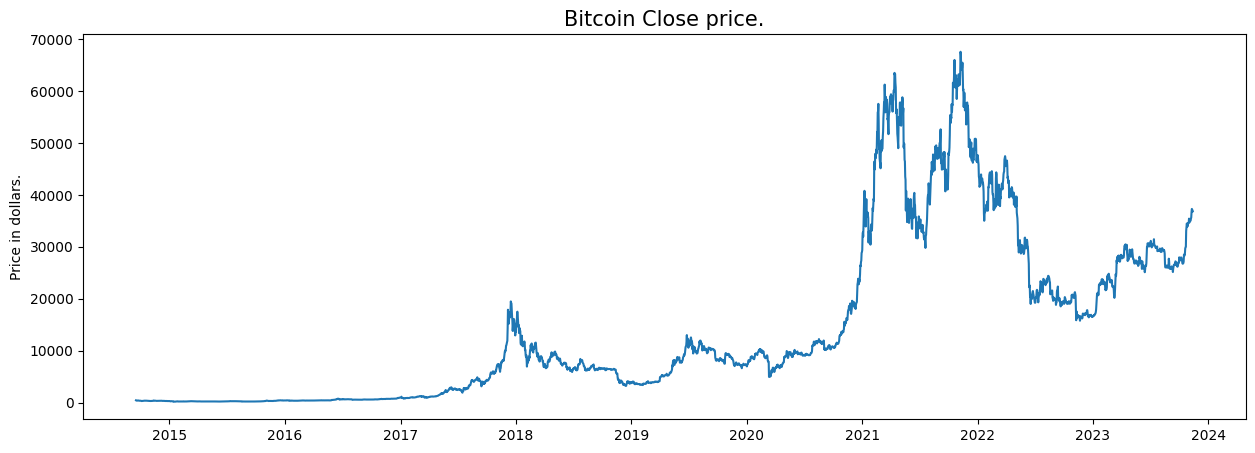

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [6]:
import matplotlib.pyplot as plt
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(df[col])
plt.show()

<ipython-input-6-04ac555bec29>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-6-04ac555bec29>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-6-04ac555bec29>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new f